# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [2]:
url = 'C:\Program Files\Python36\Scripts\Pandas Tutorial\Online_Retail.csv'
online_rt = pd.read_csv(url, encoding = 'ISO-8859-1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [3]:
cty = online_rt.loc[:, ['Quantity', 'Country']].groupby('Country').sum()
cty.head()

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356


In [4]:
cty_UK = cty.index.isin(['United Kingdom'])
cty_noUK = cty[~cty_UK]

In [5]:
cty_top10 = cty_noUK.sort_values('Quantity', ascending = False).head(10)
cty_top10

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


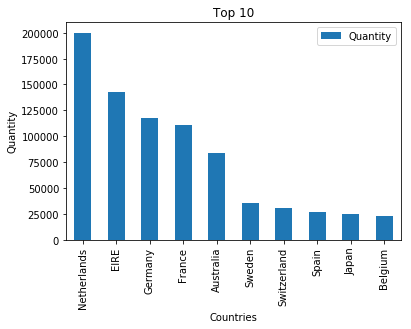

In [6]:
# hist
cty_top10.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('Top 10')

plt.show()

### Step 5.  Exclude negative Quatity entries

In [7]:
pos_quantity = online_rt[online_rt.Quantity >= 0]
pos_quantity.shape

(531285, 8)

In [8]:
online_rt.shape

(541909, 8)

In [9]:
pos_quantity.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [10]:
customers = pos_quantity.groupby(['CustomerID', 'Country']).sum()
customers.head(5)

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [11]:
# unit price should be larger than 0
pos_customers = customers[customers.UnitPrice > 0]
pos_customers.shape

(4346, 2)

In [24]:
# take the country index back as a column

# option 1
# pos_customers[country_v] = pos_customers.index.get_level_values(1)

# option 2
customersNEW = pos_customers.reset_index(level=0)
customersNEW.head(5)

,CustomerID,Country,Quantity,UnitPrice
0,12346.0,United Kingdom,74215,1.04
1,12347.0,Iceland,2458,481.21
2,12348.0,Finland,2341,178.71
3,12349.0,Italy,631,605.10
4,12350.0,Norway,197,65.30


In [27]:
sorted_customer = customersNEW.sort_values(by=['Quantity'], ascending = False)
sorted_customer.head(5)

,CustomerID,Country,Quantity,UnitPrice
1697,14646.0,Netherlands,197491,5176.09
3016,16446.0,United Kingdom,80997,4.98
1887,14911.0,EIRE,80515,26185.72
57,12415.0,Australia,77670,2097.08
0,12346.0,United Kingdom,74215,1.04


In [29]:
countries = sorted_customer.head(3).Country
countries

1697       Netherlands
3016    United Kingdom
1887              EIRE
Name: Country, dtype: object

In [32]:
plot_data = sorted_customer[sorted_customer.Country.isin(countries)]
plot_data.head()

,CustomerID,Country,Quantity,UnitPrice
1697,14646.0,Netherlands,197491,5176.09
3016,16446.0,United Kingdom,80997,4.98
1887,14911.0,EIRE,80515,26185.72
0,12346.0,United Kingdom,74215,1.04
3736,17450.0,United Kingdom,69993,1143.32


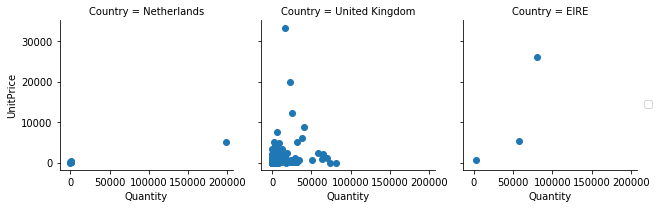

In [35]:
g = sns.FacetGrid(plot_data, col = 'Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha = 1)
g.add_legend()

### BONUS: Create your own question and answer it.